In [313]:
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt

In [314]:
physical_devices = tf.config.list_physical_devices('GPU') 
tf.config.experimental.set_memory_growth(physical_devices[0], True)

In [315]:
path = "R:/IISc/Sem 2/PRNN/Assignments/assignment-3-files/2class-Synthetic/data_noise_40.txt"

In [316]:
data = pd.read_csv(path, header=None)

In [317]:
X = np.array(data.iloc[:, :2])
y = np.array(data.iloc[:, 2])
y = y.reshape(y.shape[0], 1)

In [318]:
X

array([[1.05453635, 0.17112335],
       [0.27477109, 0.90745727],
       [0.63366591, 0.32757063],
       ...,
       [1.26768476, 0.03866206],
       [0.59238642, 0.23075212],
       [0.94424107, 0.6045979 ]])

In [319]:
y

array([[1.],
       [1.],
       [0.],
       ...,
       [1.],
       [1.],
       [1.]])

In [320]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [321]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [322]:
# from sklearn.preprocessing import OneHotEncoder
# ohe = OneHotEncoder()
# y_train = ohe.fit_transform(y_train).toarray()
# y_test = ohe.fit_transform(y_test).toarray()

In [323]:
lam = tf.keras.regularizers.l2(l=0.0001)
init = tf.initializers.he_normal()
model = tf.keras.Sequential([
    tf.keras.layers.Dense(8, input_dim=2, kernel_initializer=init, kernel_regularizer=lam),
    tf.keras.layers.ReLU(),
    # tf.keras.layers.Dropout(0.2),

    tf.keras.layers.Dense(16, kernel_initializer=init, kernel_regularizer=lam),
    tf.keras.layers.ReLU(),
    # tf.keras.layers.Dropout(0.2),

    # tf.keras.layers.Dense(16, kernel_initializer=init, kernel_regularizer=lam),
    # tf.keras.layers.ReLU(),
    # tf.keras.layers.Dropout(0.2),

    # tf.keras.layers.Dense(64, kernel_initializer=init, kernel_regularizer=lam),
    # tf.keras.layers.ReLU(),

    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.summary()

Model: "sequential_33"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_90 (Dense)             (None, 8)                 24        
_________________________________________________________________
re_lu_57 (ReLU)              (None, 8)                 0         
_________________________________________________________________
dense_91 (Dense)             (None, 16)                144       
_________________________________________________________________
re_lu_58 (ReLU)              (None, 16)                0         
_________________________________________________________________
dense_92 (Dense)             (None, 1)                 17        
Total params: 185
Trainable params: 185
Non-trainable params: 0
_________________________________________________________________


In [324]:
opt = tf.keras.optimizers.SGD(learning_rate=0.1)
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, min_lr=0.001)
# early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

In [325]:
history = model.fit(X_train, y_train, epochs=120, batch_size=32, validation_split=0.1, shuffle=True, callbacks=[reduce_lr])

Epoch 1/120
45/45 [==============================] - 1s 8ms/step - loss: 0.7083 - accuracy: 0.4991 - val_loss: 0.6962 - val_accuracy: 0.4938
Epoch 2/120
45/45 [==============================] - 0s 4ms/step - loss: 0.6977 - accuracy: 0.5236 - val_loss: 0.6963 - val_accuracy: 0.5063
Epoch 3/120
45/45 [==============================] - 0s 4ms/step - loss: 0.6987 - accuracy: 0.5360 - val_loss: 0.6953 - val_accuracy: 0.5000
Epoch 4/120
45/45 [==============================] - 0s 4ms/step - loss: 0.6955 - accuracy: 0.5232 - val_loss: 0.6923 - val_accuracy: 0.5688
Epoch 5/120
45/45 [==============================] - 0s 4ms/step - loss: 0.6923 - accuracy: 0.5426 - val_loss: 0.6970 - val_accuracy: 0.5375
Epoch 6/120
45/45 [==============================] - 0s 4ms/step - loss: 0.6954 - accuracy: 0.5226 - val_loss: 0.7003 - val_accuracy: 0.5312
Epoch 7/120
45/45 [==============================] - 0s 4ms/step - loss: 0.6926 - accuracy: 0.5477 - val_loss: 0.6917 - val_accuracy: 0.5562
Epoch 8/120
4

In [326]:
y_pred = model.predict(X_test)

In [327]:
pred = []
for i in range(len(y_pred)):
    if y_pred[i] < 0.5:
        pred.append(0)
    else:
        pred.append(1)

In [328]:
from sklearn.metrics import accuracy_score, confusion_matrix
a = accuracy_score(pred, y_test)
print('Accuracy is:', a*100)

Accuracy is: 55.25


<AxesSubplot:>

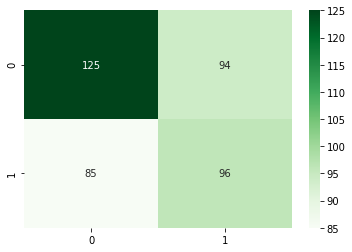

In [329]:
sns.heatmap(confusion_matrix(pred, y_test), annot=True, fmt='g', cmap='Greens')

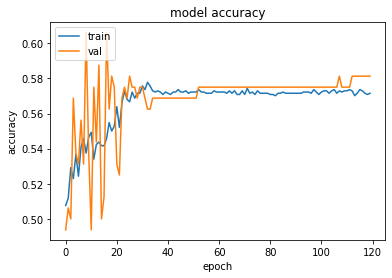

In [330]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

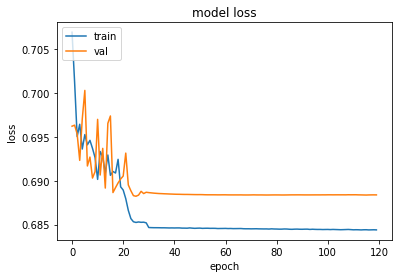

In [331]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()